In [10]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('summary_general-2.txt', sep=r'\s*\|\s*', engine='python')

# Display the first few rows of the dataset
print(data.head())

# Remove rows with NaN values
data = data.dropna()

# Create additional features
data['Normalized_T50'] = data['T50'] / data['T90']
data['Log_T50'] = np.log(data['T50'])
data['T50_to_T90'] = data['T50'] / data['T90']

# Prepare the feature matrix for clustering
features = ['T50', 'Normalized_T50', 'Log_T50', 'T50_to_T90']
X = data[features]

# Standardize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X_scaled)

# Predict the clusters
clusters = kmeans.predict(X_scaled)

# Add the cluster labels to the dataset
data['Cluster'] = clusters

# Evaluate the clustering with silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Display the updated dataset with cluster labels
#print(data.head())


   ## GRBname    Trig_ID  Trig_time_met               Trig_time_UTC  \
0  GRB231215A  1202522.0   7.243265e+08  2023-12-15T09:47:25.273080   
1  GRB231214A  1202386.0   7.242783e+08  2023-12-14T20:24:28.316380   
2  GRB231210B  1201696.0   7.239366e+08  2023-12-10T21:29:04.499760   
3  GRB231205B  1200812.0   7.234875e+08  2023-12-05T16:43:59.506460   
4  GRB231129A  1199764.0   7.229272e+08  2023-11-29T05:05:59.096760   

   RA_ground  DEC_ground  Image_position_err  Image_SNR      T90    T90_err  \
0    9.72982    57.63370            1.296588   20.98807   22.096   3.472525   
1  305.66880   -72.43144            0.917670   34.38932   27.636   4.568637   
2   95.80293   -48.33463            1.761250   13.55020    7.472   0.647951   
3   54.15053    27.14630            0.978140   31.39288   64.000  16.000000   
4  317.54100    41.53033            0.960403   32.22439  106.324   2.018324   

      T50    T50_err  Evt_start_sincetrig  Evt_stop_sincetrig   pcode  \
0   7.040   1.432603     

In [11]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('summary_general-2.txt', sep=r'\s*\|\s*', engine='python')

# Remove rows with NaN values
data = data.dropna()

# Create additional features
data['Normalized_T50'] = data['T50'] / data['T90']
data['Log_T50'] = np.log(data['T50'])
data['T50_to_T90'] = data['T50'] / data['T90']

# Prepare the feature matrix for clustering
features = ['T50', 'Normalized_T50', 'Log_T50', 'T50_to_T90']
X = data[features]

# Standardize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection
selector = SelectKBest(f_classif, k='all')  # Use 'all' to keep all features; adjust k as needed
X_selected = selector.fit_transform(X_scaled, data['T90'])

# Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization; adjust as needed
X_pca = pca.fit_transform(X_selected)

# Trying Different Numbers of Clusters
for n_clusters in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, clusters)
    print(f'K-means with {n_clusters} clusters - Silhouette Score: {silhouette_avg:.2f}')

# Trying Different Clustering Algorithms
# K-means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_pca)
silhouette_avg_kmeans = silhouette_score(X_pca, clusters_kmeans)
print(f'K-means Silhouette Score: {silhouette_avg_kmeans:.2f}')

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters_dbscan = dbscan.fit_predict(X_pca)
silhouette_avg_dbscan = silhouette_score(X_pca, clusters_dbscan)
print(f'DBSCAN Silhouette Score: {silhouette_avg_dbscan:.2f}')

# Add the cluster labels to the dataset
data['Cluster_KMeans'] = clusters_kmeans
data['Cluster_DBSCAN'] = clusters_dbscan

# Display the updated dataset with cluster labels
print(data.head())


K-means with 2 clusters - Silhouette Score: 0.29
K-means with 3 clusters - Silhouette Score: 0.37
K-means with 4 clusters - Silhouette Score: 0.30
K-means with 5 clusters - Silhouette Score: 0.25
K-means Silhouette Score: 0.29


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [12]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('summary_general-2.txt', sep=r'\s*\|\s*', engine='python')

# Remove rows with NaN values
data = data.dropna()

# Create additional features
data['Normalized_T50'] = data['T50'] / data['T90']
data['Log_T50'] = np.log(data['T50'])
data['T50_to_T90'] = data['T50'] / data['T90']

# Prepare the feature matrix for clustering
features = ['T50', 'Normalized_T50', 'Log_T50', 'T50_to_T90']
X = data[features]

# Standardize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed
clusters_iso = iso_forest.fit_predict(X_scaled)

# Convert -1 (anomalies) to 1 and 1 (inliers) to 0 for easier interpretation
data['Cluster_IsolationForest'] = np.where(clusters_iso == -1, 1, 0)

# Evaluate the results (if you have ground truth labels)
# For this example, we'll assume you don't have ground truth, so this step is optional
# If you had labels, you could evaluate as follows:
# y_true = data['Ground_Truth_Label']  # Replace with actual ground truth labels
# y_pred = data['Cluster_IsolationForest']
# accuracy = accuracy_score(y_true, y_pred)
# print(f'Accuracy: {accuracy:.2f}')
# print(classification_report(y_true, y_pred))

# Display the updated dataset with cluster labels
print(data.head())


     ## GRBname    Trig_ID  Trig_time_met               Trig_time_UTC  \
79   GRB220404A  1101133.0   6.707661e+08  2022-04-04T11:54:30.425640   
261  GRB191001B   927345.0   5.916432e+08  2019-10-01T17:19:20.323880   
283  GRB190512A   903357.0   5.793648e+08  2019-05-12T14:40:09.107780   
347  GRB180718A   848489.0   5.535719e+08       20180718T01:57:44.530   
667  GRB141102A   617316.0   4.366255e+08     2014-11-02T12:51:39.265   

     RA_ground  DEC_ground  Image_position_err  Image_SNR      T90    T90_err  \
79    50.42823   10.007620            2.890318   6.677664    5.280   0.946708   
261   86.35829  -15.895900            3.292839   5.542834  107.136   9.354354   
283   82.39738   -7.581785            2.868023   6.751946   40.072  11.330850   
347  336.01900    2.789800            3.008257   6.307659    0.084   0.023324   
667  208.61400  -47.100000            6.407657   2.141646   14.400   1.600000   

     ...  Evt_start_sincetrig  Evt_stop_sincetrig   pcode   Trigger_method

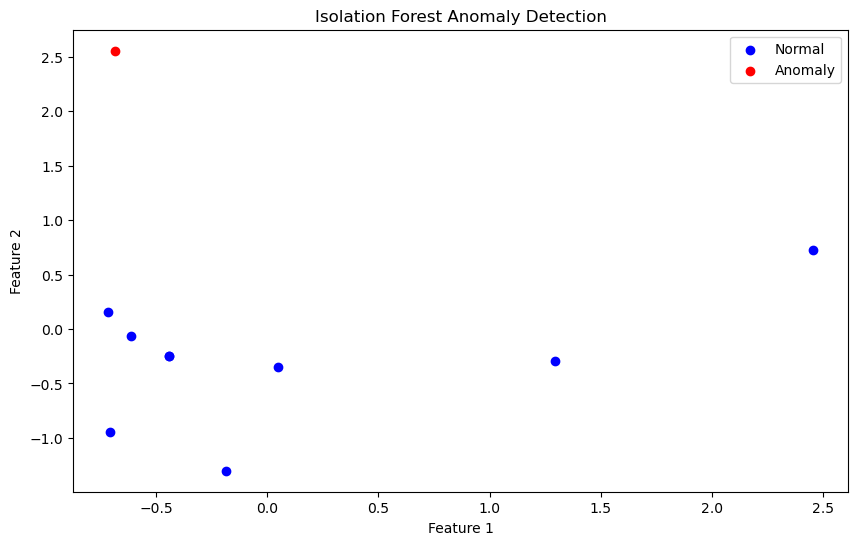

In [13]:
import matplotlib.pyplot as plt

# Assuming you have reduced to 2D or have 2 features for visualization
plt.figure(figsize=(10, 6))

# Plot normal data points
plt.scatter(X_scaled[data['Cluster_IsolationForest'] == 0, 0], 
            X_scaled[data['Cluster_IsolationForest'] == 0, 1], 
            c='blue', label='Normal')

# Plot anomalies
plt.scatter(X_scaled[data['Cluster_IsolationForest'] == 1, 0], 
            X_scaled[data['Cluster_IsolationForest'] == 1, 1], 
            c='red', label='Anomaly')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.show()


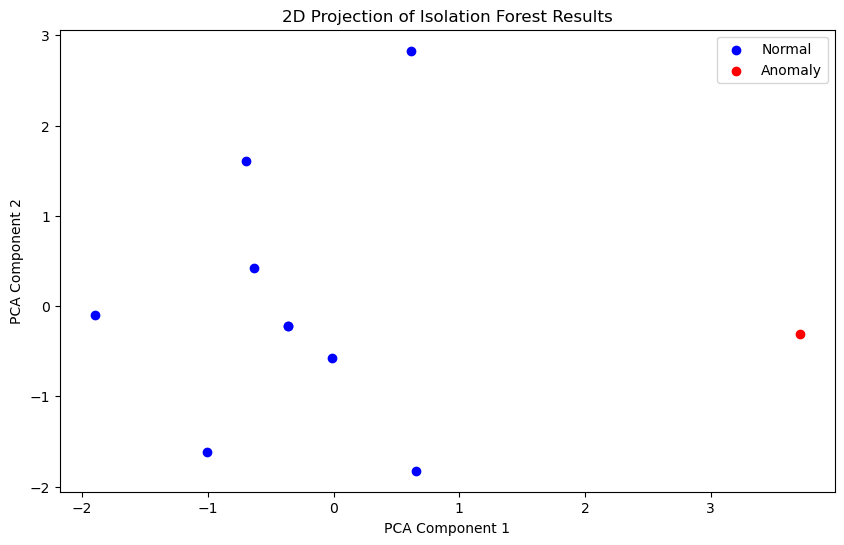

In [14]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))

# Plot normal data points
plt.scatter(X_pca[data['Cluster_IsolationForest'] == 0, 0], 
            X_pca[data['Cluster_IsolationForest'] == 0, 1], 
            c='blue', label='Normal')

# Plot anomalies
plt.scatter(X_pca[data['Cluster_IsolationForest'] == 1, 0], 
            X_pca[data['Cluster_IsolationForest'] == 1, 1], 
            c='red', label='Anomaly')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Projection of Isolation Forest Results')
plt.legend()
plt.show()


In [15]:
import numpy as np

# Create a grid to evaluate the decision function
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict decision function
Z = iso_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster_IsolationForest'], cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title('Decision Function of Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


ValueError: X has 2 features, but IsolationForest is expecting 4 features as input.

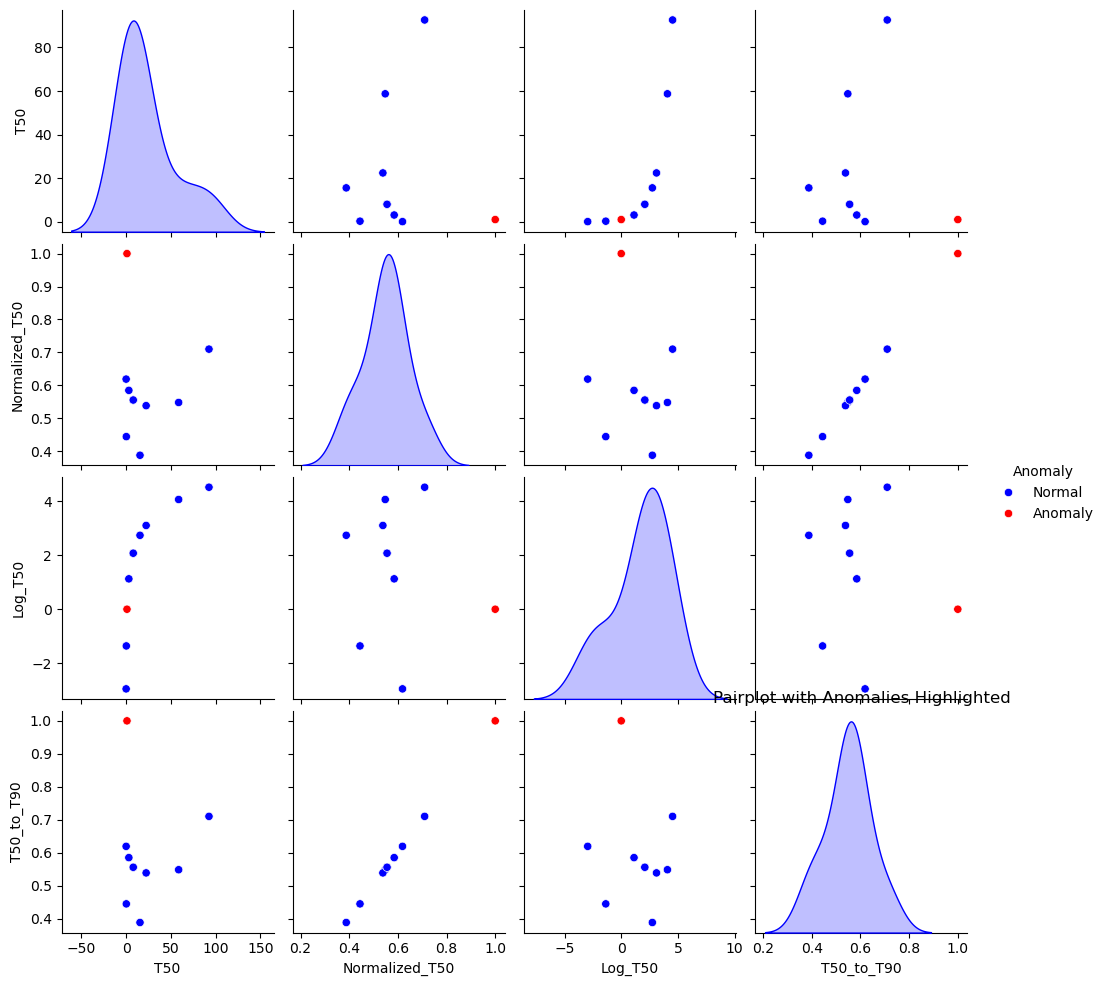

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add anomaly labels to the dataset
data['Anomaly'] = np.where(data['Cluster_IsolationForest'] == 1, 'Anomaly', 'Normal')

# Create a pairplot
sns.pairplot(data, hue='Anomaly', vars=['T50', 'Normalized_T50', 'Log_T50', 'T50_to_T90'], palette={'Anomaly': 'red', 'Normal': 'blue'})
plt.title('Pairplot with Anomalies Highlighted')
plt.show()


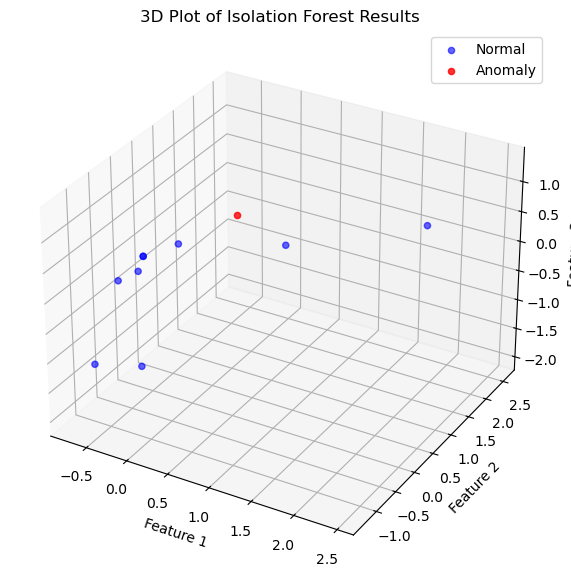

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have three features, e.g., T50, Normalized_T50, and Log_T50
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot normal data points
ax.scatter(X_scaled[data['Cluster_IsolationForest'] == 0, 0], 
           X_scaled[data['Cluster_IsolationForest'] == 0, 1], 
           X_scaled[data['Cluster_IsolationForest'] == 0, 2], 
           c='blue', label='Normal', alpha=0.6)

# Plot anomalies
ax.scatter(X_scaled[data['Cluster_IsolationForest'] == 1, 0], 
           X_scaled[data['Cluster_IsolationForest'] == 1, 1], 
           X_scaled[data['Cluster_IsolationForest'] == 1, 2], 
           c='red', label='Anomaly', alpha=0.8)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Plot of Isolation Forest Results')
plt.legend()
plt.show()


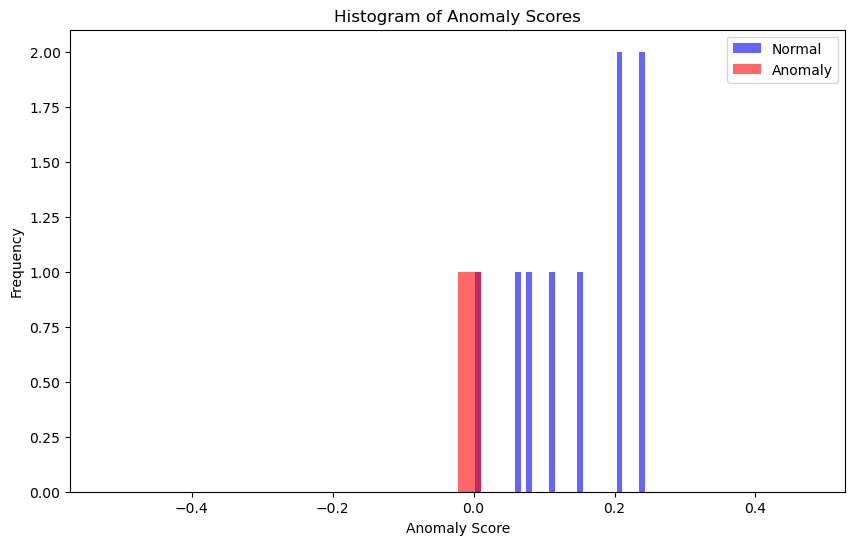

In [19]:
# Compute anomaly scores
anomaly_scores = iso_forest.decision_function(X_scaled)

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores[data['Cluster_IsolationForest'] == 0], bins=30, alpha=0.6, color='blue', label='Normal')
plt.hist(anomaly_scores[data['Cluster_IsolationForest'] == 1], bins=30, alpha=0.6, color='red', label='Anomaly')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores')
plt.legend()
plt.show()


Selected Features: ['T50', 'Normalized_T50', 'Log_T50', 'T50_to_T90']


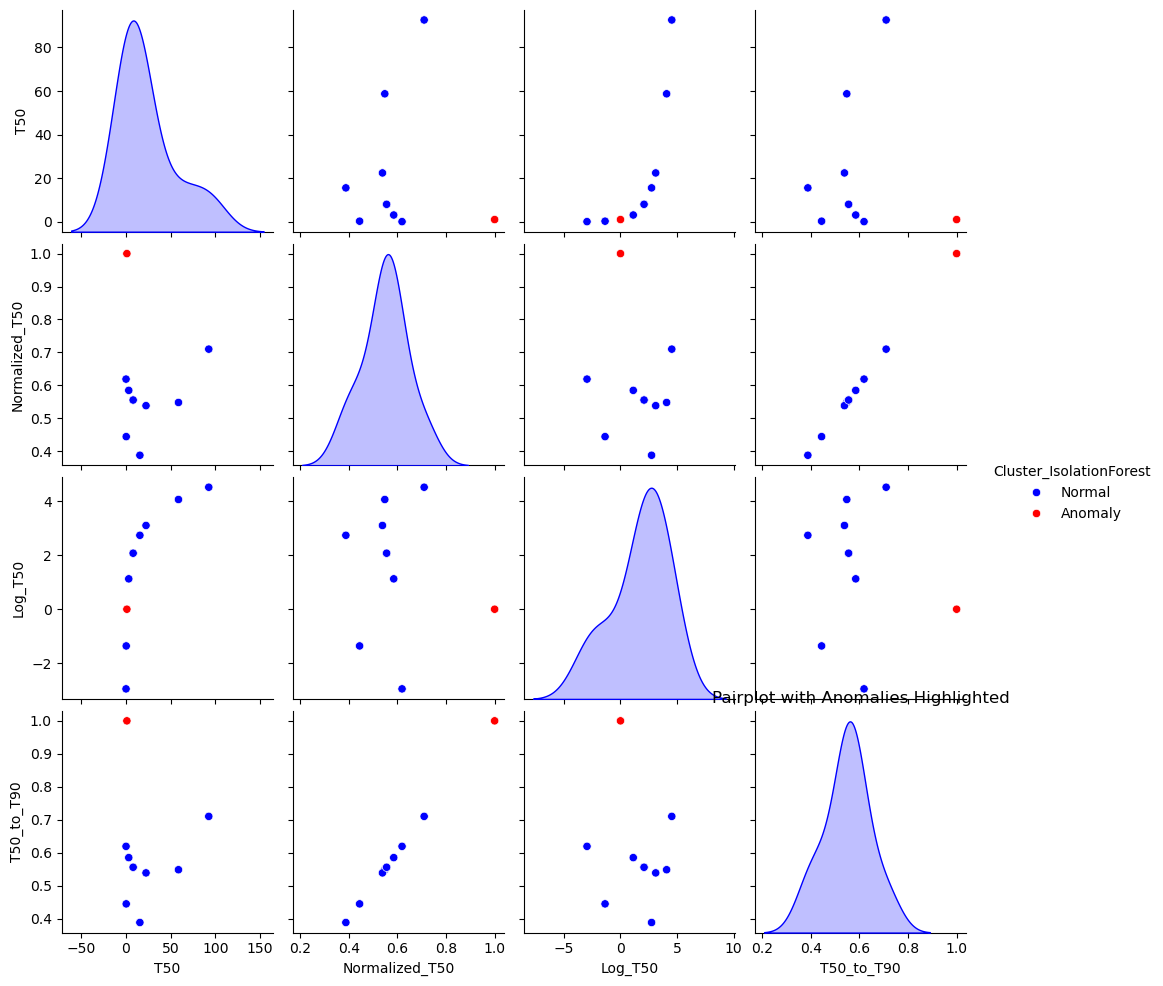

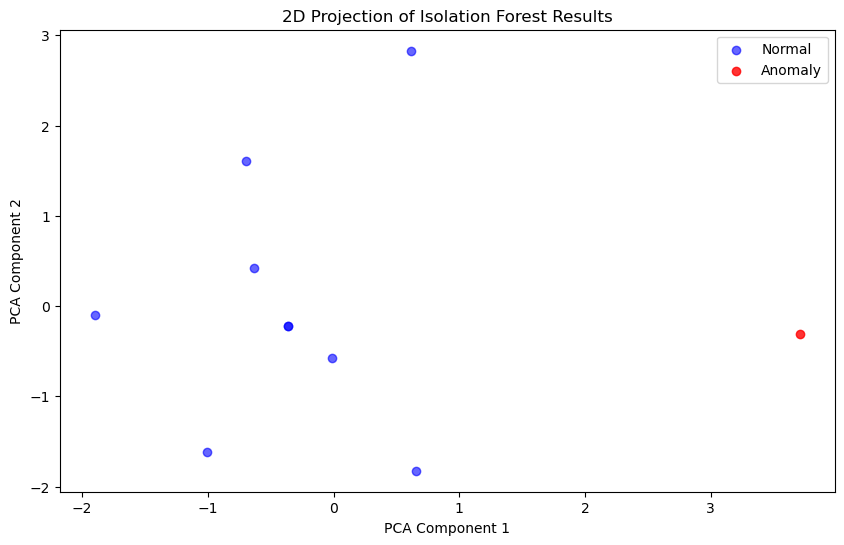

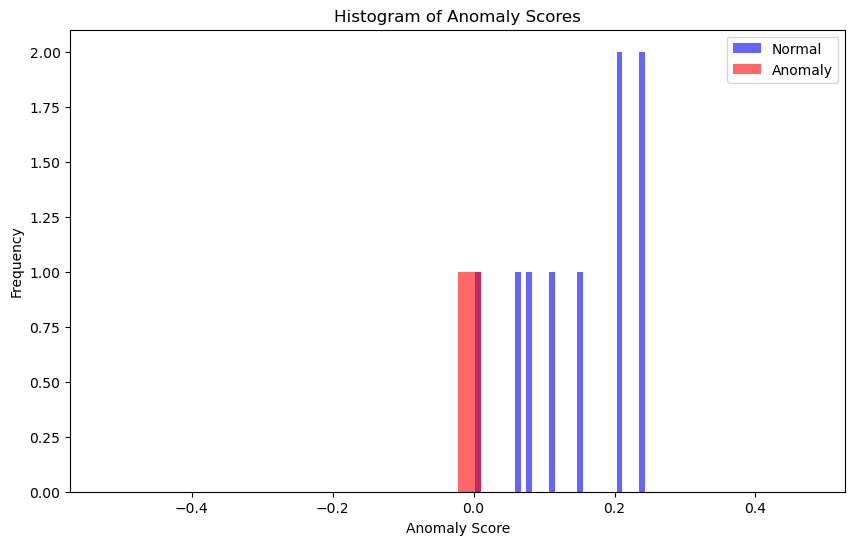

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('summary_general-2.txt', sep=r'\s*\|\s*', engine='python')

# Remove rows with NaN values
data = data.dropna()

# Create additional features
data['Normalized_T50'] = data['T50'] / data['T90']
data['Log_T50'] = np.log(data['T50'])
data['T50_to_T90'] = data['T50'] / data['T90']

# Prepare the feature matrix
features = ['T50', 'Normalized_T50', 'Log_T50', 'T50_to_T90']
X = data[features]

# Standardize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using mutual information
selector = SelectKBest(mutual_info_classif, k='all')  # Adjust k as needed
X_selected = selector.fit_transform(X_scaled, np.zeros(X_scaled.shape[0]))  # Dummy target variable

# Identify the selected features
selected_features = [features[i] for i in range(len(features)) if selector.get_support()[i]]
print("Selected Features:", selected_features)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
clusters_iso = iso_forest.fit_predict(X_selected)

# Add anomaly labels to the dataset
data['Cluster_IsolationForest'] = np.where(clusters_iso == -1, 'Anomaly', 'Normal')

# Visualization: Pairplot
sns.pairplot(data, hue='Cluster_IsolationForest', vars=selected_features, palette={'Anomaly': 'red', 'Normal': 'blue'})
plt.title('Pairplot with Anomalies Highlighted')
plt.show()

# Dimensionality Reduction for visualization (if more than 2 features)
if len(selected_features) > 2:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_selected)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[data['Cluster_IsolationForest'] == 'Normal', 0], 
                X_pca[data['Cluster_IsolationForest'] == 'Normal', 1], 
                c='blue', label='Normal', alpha=0.6)
    plt.scatter(X_pca[data['Cluster_IsolationForest'] == 'Anomaly', 0], 
                X_pca[data['Cluster_IsolationForest'] == 'Anomaly', 1], 
                c='red', label='Anomaly', alpha=0.8)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('2D Projection of Isolation Forest Results')
    plt.legend()
    plt.show()

# Histogram of Anomaly Scores
anomaly_scores = iso_forest.decision_function(X_selected)

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores[data['Cluster_IsolationForest'] == 'Normal'], bins=30, alpha=0.6, color='blue', label='Normal')
plt.hist(anomaly_scores[data['Cluster_IsolationForest'] == 'Anomaly'], bins=30, alpha=0.6, color='red', label='Anomaly')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores')
plt.legend()
plt.show()


Feature Importance in PCA:
                          PC1       PC2
Evt_start_sincetrig  0.408236  0.038065
T90_err              0.391930  0.070310
T50_err              0.391154  0.145138
T90                  0.383304  0.193610
T50                  0.380886  0.198787
Evt_stop_sincetrig   0.366346  0.163708
Trig_time_met        0.179253  0.028447
Trig_ID              0.174818  0.070403
Image_position_err   0.142807  0.539848
Image_SNR            0.127294  0.547299
RA_ground            0.029180  0.401875
DEC_ground           0.018149  0.263383
pcode                0.007487  0.202804
                          PC1       PC2
Image_SNR            0.127294  0.547299
Image_position_err   0.142807  0.539848
RA_ground            0.029180  0.401875
DEC_ground           0.018149  0.263383
pcode                0.007487  0.202804
T50                  0.380886  0.198787
T90                  0.383304  0.193610
Evt_stop_sincetrig   0.366346  0.163708
T50_err              0.391154  0.145138
Trig_ID      

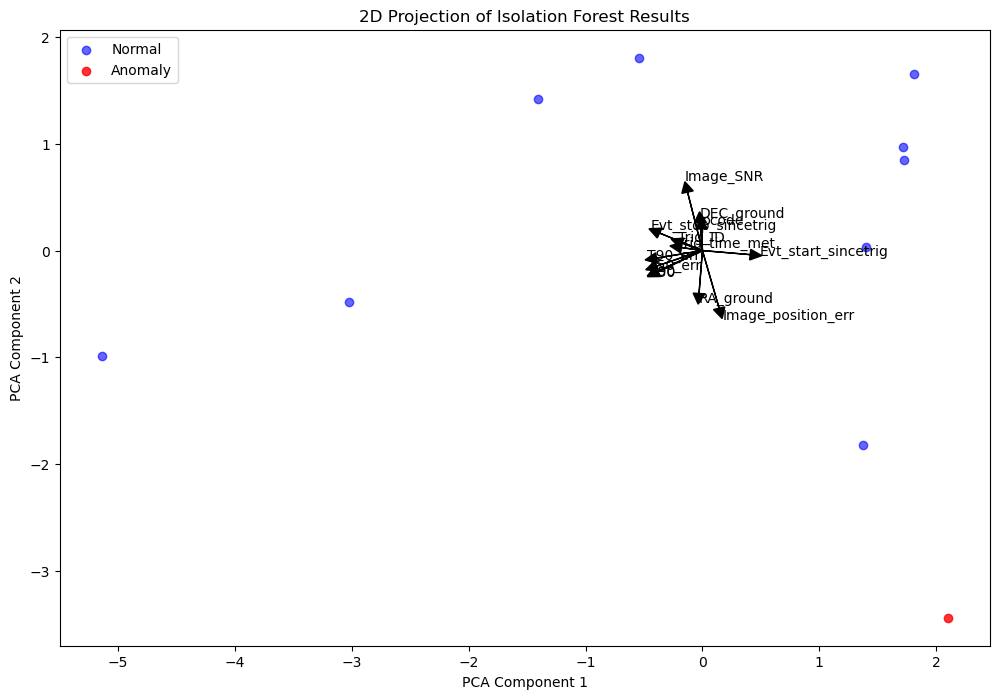

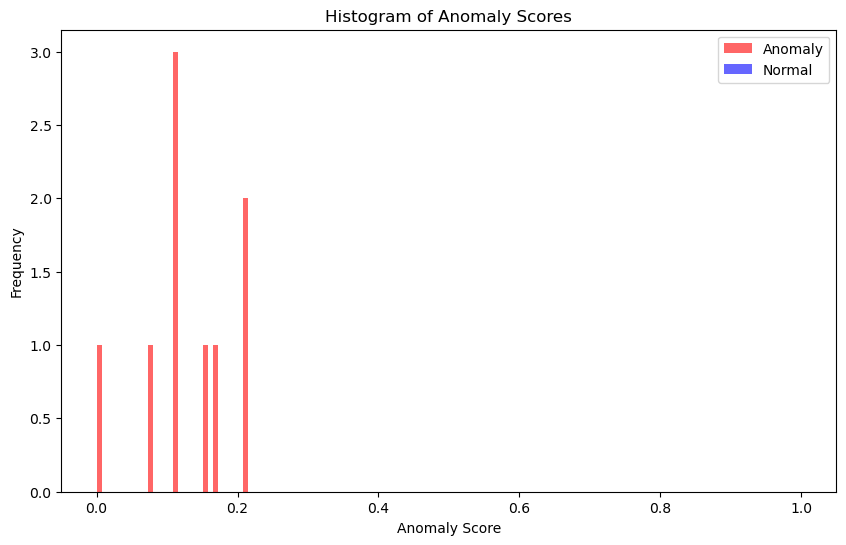

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('summary_general-2.txt', sep=r'\s*\|\s*', engine='python')

# Remove rows with NaN values
data = data.dropna()

# Select numeric columns for feature extraction
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Prepare the feature matrix using all numeric features
X = data[numeric_features]

# Standardize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
clusters_iso = iso_forest.fit_predict(X_pca)

# Add anomaly labels to the dataset
data['Cluster_IsolationForest'] = np.where(clusters_iso == -1, 'Anomaly', 'Normal')

# Feature importance from PCA
feature_importance = pd.DataFrame(pca.components_, columns=numeric_features, index=['PC1', 'PC2']).T
feature_importance['PC1'] = feature_importance['PC1'].abs()
feature_importance['PC2'] = feature_importance['PC2'].abs()

# Print feature importance
print("Feature Importance in PCA:")
print(feature_importance.sort_values(by='PC1', ascending=False))
print(feature_importance.sort_values(by='PC2', ascending=False))

# Visualization: 2D Projection of PCA Components with Feature Names
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[data['Cluster_IsolationForest'] == 'Normal', 0], 
            X_pca[data['Cluster_IsolationForest'] == 'Normal', 1], 
            c='blue', label='Normal', alpha=0.6)
plt.scatter(X_pca[data['Cluster_IsolationForest'] == 'Anomaly', 0], 
            X_pca[data['Cluster_IsolationForest'] == 'Anomaly', 1], 
            c='red', label='Anomaly', alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Projection of Isolation Forest Results')
plt.legend()

# Annotate feature contributions
for i, feature in enumerate(numeric_features):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.text(pca.components_[0, i]*1.2, pca.components_[1, i]*1.2, 
             feature, color='k', fontsize=10)

plt.show()

# Histogram of Anomaly Scores
anomaly_scores = iso_forest.decision_function(X_pca)

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores[clusters_iso == 1], bins=30, alpha=0.6, color='red', label='Anomaly')
plt.hist(anomaly_scores[clusters_iso == 0], bins=30, alpha=0.6, color='blue', label='Normal')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores')
plt.legend()
plt.show()
